<!-- WE WILL IMPORT PANDAS , NUMPY AND MATPLOTLIB LIBRARY OF PYTHON -->

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#import the csv file

In [45]:
df=pd.read_csv("carprices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [ ]:
# we will import label encoder to covert car model name to integer form  

In [46]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dfle=df

In [47]:
dfle=dfle.rename(columns={dfle.columns[0]:"Car_Model"})
dfle=dfle.rename(columns={dfle.columns[2]:"Sell_price"})
dfle


,Car_Model,Mileage,Sell_price,Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [48]:
dfle.Car_Model=le.fit_transform(dfle.Car_Model)
dfle

,Car_Model,Mileage,Sell_price,Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [49]:
X=dfle[['Car_Model','Mileage',"Age(yrs)"]].values
X

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]], dtype=int64)

In [ ]:
#we are taking dependent variable y(sell prices) which depends on car model ,mileage,age of car

In [50]:
y=dfle.Sell_price.values
y

array([18000, 34000, 26100, 40000, 31500, 29400, 32000, 19300, 12000,
       22000, 20000, 21000, 33000], dtype=int64)

In [ ]:
#import one hot encoder which assigns a value of 1 to the feature of each sample that corresponds to its original category.

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('Car_Model', OneHotEncoder(), [0])], remainder = 'passthrough')

ColumnTransformer(remainder='passthrough',
                  transformers=[('Car_Model', OneHotEncoder(), [0])])

In [ ]:
#we plot graph to see how sell prices varies with age of car

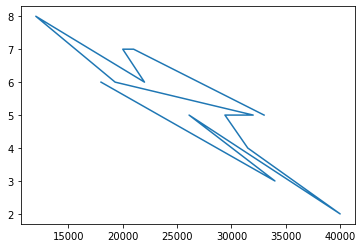

In [52]:
plt.plot(dfle.Sell_price,dfle["Age(yrs)"])

In [ ]:
# we apply linear regression ml model 

In [53]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
X=ct.fit_transform(X)
X

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [55]:
model.fit(X,y)


LinearRegression()

In [ ]:
#we try to predict price though providing input

In [56]:
model.predict([[0,0,1,45000,4]])

array([36991.31721061])

In [ ]:
#here we will check score of our model

In [57]:
model.score(X,y)

0.9417050937281082